In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("stroke_data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.drop(['id'],axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

### Uni-variate Analysis

Count of stroke and healthy patients in data:
0    4861
1     249
Name: stroke, dtype: int64

Percentage distribution of stroke and healthy patients in data:
0    0.951272
1    0.048728
Name: stroke, dtype: float64



Text(0.5, 1.0, 'Frequency distribution of stroke and healthy patients in data')

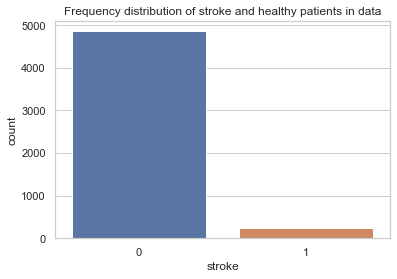

In [5]:
#stroke
print(f"Count of stroke and healthy patients in data:\n{data['stroke'].value_counts()}\n")
print(f"Percentage distribution of stroke and healthy patients in data:\n{data['stroke'].value_counts()/data.shape[0]}\n")
sns.countplot(x='stroke',data=data)
plt.title("Frequency distribution of stroke and healthy patients in data")

Count of Married and Single/divorced patients in data:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Percentage distribution of Married and Single/divorced patients in data:
Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64



Text(0.5, 1.0, 'Frequency distribution of Married and Single/divorced patients in data')

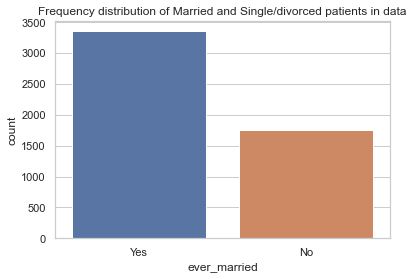

In [6]:
#ever_married
print(f"Count of Married and Single/divorced patients in data:\n{data['ever_married'].value_counts()}\n")
print(f"Percentage distribution of Married and Single/divorced patients in data:\n{data['ever_married'].value_counts()/data.shape[0]}\n")
sns.countplot(x='ever_married',data=data)
plt.title("Frequency distribution of Married and Single/divorced patients in data")

Count of Residence_type of patients in data:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Percentage distribution of Residence_type of patients in data:
Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64



Text(0.5, 1.0, 'Frequency distribution of the Residence_type of patients')

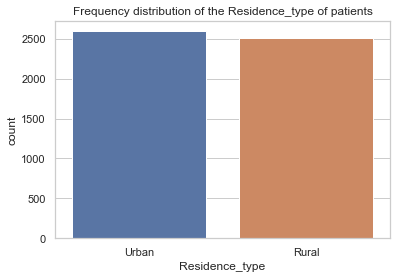

In [7]:
#Residence_type
print(f"Count of Residence_type of patients in data:\n{data['Residence_type'].value_counts()}\n")
print(f"Percentage distribution of Residence_type of patients in data:\n{data['Residence_type'].value_counts()/data.shape[0]}\n")
sns.countplot(x='Residence_type',data=data)
plt.title("Frequency distribution of the Residence_type of patients")

Count of patient's occupation in data:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Percentage distribution of patient's occupation in data:
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64



Text(0.5, 1.0, "Frequency distribution of patient's occupation")

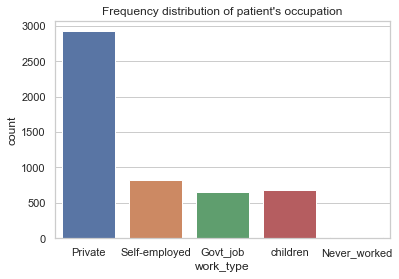

In [8]:
#work_type 
print(f"Count of patient's occupation in data:\n{data['work_type'].value_counts()}\n")
print(f"Percentage distribution of patient's occupation in data:\n{data['work_type'].value_counts()/data.shape[0]}\n")
sns.countplot(x='work_type',data=data)
plt.title("Frequency distribution of patient's occupation")

### Bi-variate Analysis

ever_married  Residence_type
No            Rural              872
              Urban              885
Yes           Rural             1642
              Urban             1711
Name: Residence_type, dtype: int64


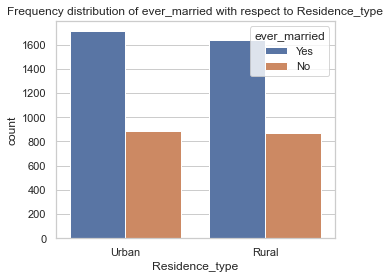

In [9]:
#group data by ever_married and Residence_type variables.
print(data.groupby(['ever_married','Residence_type'])['Residence_type'].count())
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="Residence_type", hue="ever_married", data=data)
plt.title('Frequency distribution of ever_married with respect to Residence_type')
plt.show()

### Multivariate Analysis

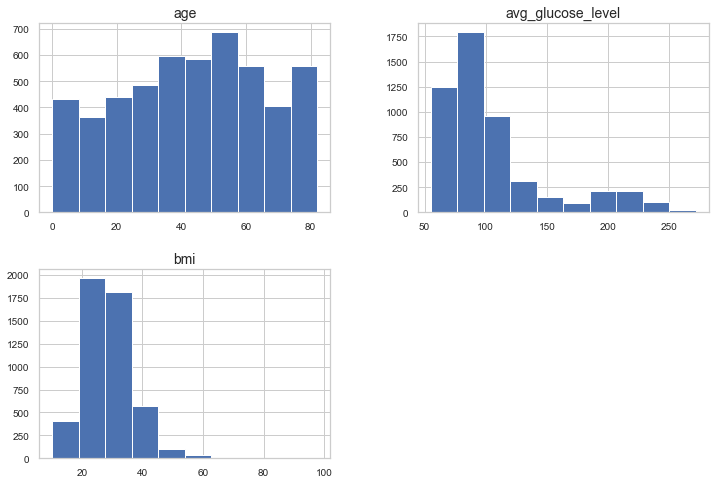

In [10]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data_num = data.select_dtypes(include=[np.number])
data_num = data_num[['age','avg_glucose_level','bmi']]
data_num.hist(bins=10, figsize=(12, 8))
plt.show()

#### Pairplot

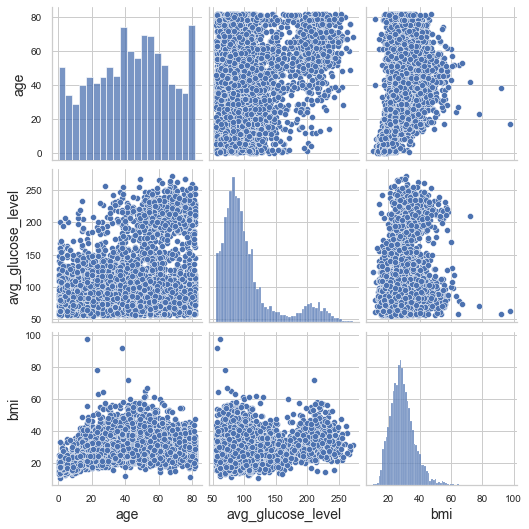

In [11]:
sns.pairplot(data_num)

#### Correlation Heatmap

<AxesSubplot:>

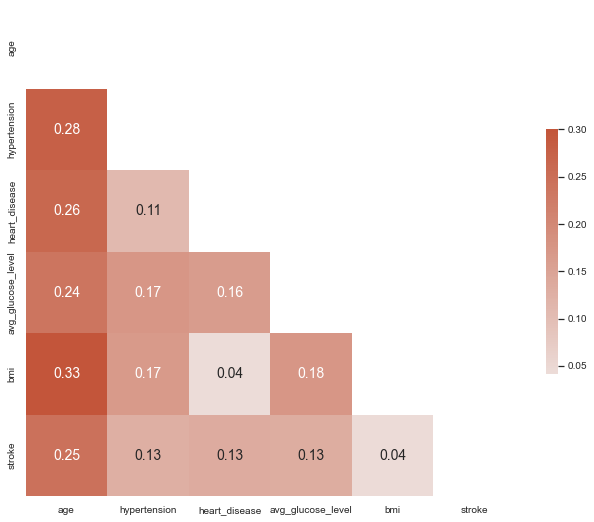

In [12]:
#correlation heatmap plot
data_num_corr = data.select_dtypes(include=[np.number])
corr = data_num_corr.drop(['id'],1).corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,annot=True, fmt='.2f',vmax=.3,cbar_kws={'shrink':.5})

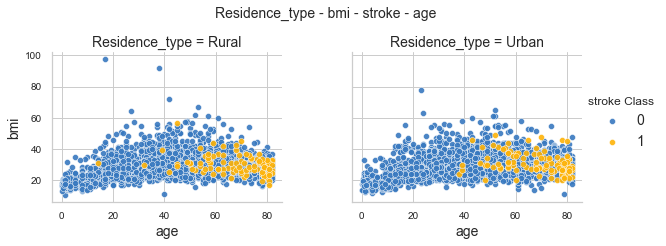

In [13]:
#plotting conditional relationship using Multi-plot grid.
g = sns.FacetGrid(data, col="Residence_type", hue='stroke',col_order=["Rural","Urban"], 
hue_order=[0,1],aspect=1.2, height=3.5, palette=sns.xkcd_palette(colors=["windows blue", "amber"]))
g.map(plt.scatter, "age", "bmi", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Residence_type - bmi - stroke - age', fontsize=14)
#Add legend
l = g.add_legend(title='stroke Class')

## Data Preprocessing

#### Data Type correction
- Age is discrete not continuous. Hence, should be an integer not float 

In [14]:
#correct data type for age
data['age'] = data['age'].astype(np.int64)

#### Encoding Categorical  Attributes

In [15]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Creating a Test set

In [16]:
from sklearn.model_selection import train_test_split

input_features = data.drop(['stroke'],1)
target = data['stroke']

Train, Test, train_target, test_target = train_test_split(input_features,target,test_size=0.2,random_state=34)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

ct = ColumnTransformer(transformers = [("lb_encoder",OrdinalEncoder(),[1,5,7]),
                                ('ohe_encoder', OneHotEncoder(),[6,10])],
                                remainder ='passthrough')

Train = ct.fit_transform(Train)
Test = ct.transform(Test)


In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Train[:,17] = imputer.fit_transform(Train[:,17].reshape(-1, 1)).reshape(1, -1)
Test[:,17] = imputer.transform(Test[:,17].reshape(-1, 1)).reshape(1, -1)

In [19]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE(random_state=2)
Train, train_target = oversample.fit_resample(Train, train_target)

In [36]:
from sklearn.model_selection import  StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
skf= StratifiedKFold(n_splits=10,random_state=199,shuffle=True)

estimator_rf=RandomForestClassifier(random_state=23,n_jobs=-1,n_estimators= 500,
                                   min_samples_split= 2,max_features="auto",max_depth=9)

estimator_rf.fit(Train, train_target)
train_predictions =estimator_rf.predict_proba(Train)[:,1]
test_predictions = estimator_rf.predict_proba(Test)[:,1]
print(f"Logloss for training set: {log_loss(train_target,train_predictions)}")
print(f"Logloss for testing set: {log_loss(test_target,test_predictions)}")

Logloss for training set: 0.11265972238806553
Logloss for testing set: 0.193260471206383


In [37]:
estimator_rf

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=500,
                       n_jobs=-1, random_state=23)